In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("data16.csv", sep = ";", names = ["x_0", "x_1", "y"])
train_size = len(data) // 2
test_size = len(data) - train_size
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = ["y"]).reset_index().drop(columns = ["index"]), data.y, test_size=0.5)
eta = 0.1
weights = np.zeros(len(data.columns) - 1)
tau = 0
errors = [train_size]
while(errors[-1] != 0):
  error = 0
  for x, y in zip(x_train.to_numpy(), y_train.to_numpy()):
    scalar_product = 1 if (np.dot(x, weights) >= tau) else 0
    difference = y - scalar_product
    error += int(difference != 0.0)
    for k in range(0, len(weights)):
         weights[k] += eta * difference * x[k]
    tau -= eta * difference
  errors.append(error)
y_pred = []
for i in range(0, len(x_test)): y_pred.append(1 if (np.dot(weights, x_test.iloc[i]) >= tau) else 0)
print(np.array(y_pred))
print(y_test.to_numpy())
print(weights)

[1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0 0 1 1]
[1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 1 0 1 0 0 1 1]
[0.5038 0.0949]


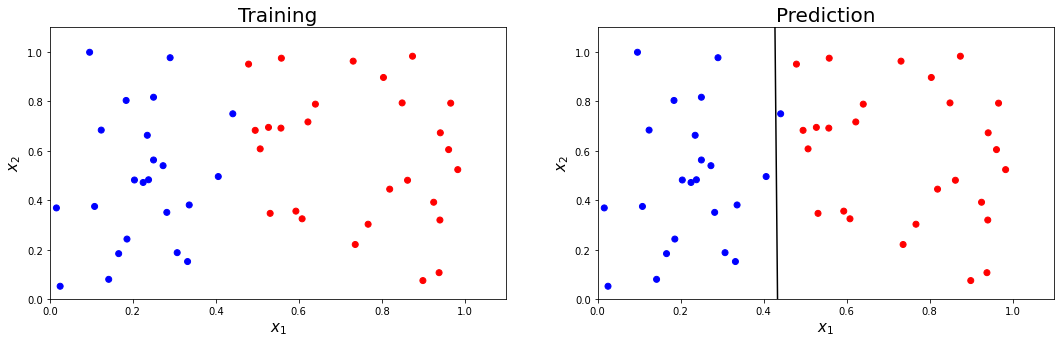

In [ ]:
x_lin = np.linspace(0, 1, 100)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(18, 5))
ax1.set_xlim(0, 1.1)
ax1.set_ylim(0, 1.1)
ax2.set_xlim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax1.set_title('Training', fontsize = 20)
ax1.set_xlabel('$x_1$', fontsize = 15)
ax1.set_ylabel('$x_2$', fontsize = 15)
ax2.set_title('Prediction', fontsize = 20)
ax2.set_xlabel('$x_1$', fontsize = 15)
ax2.set_ylabel('$x_2$', fontsize = 15)
color = ['red' if value == 1 else 'blue' for value in y_test.to_numpy()]
ax1.scatter(x_test.x_0, x_test.x_1, marker = 'o', color = color)
ax2.plot(x_lin, -weights[0] / weights[1] * x_lin + tau / weights[1], color = 'black')
ax2.scatter(x_test.x_0, x_test.x_1, marker = 'o', color = color)
